# Animation of the Four Simulation Cases

In [1]:
import climlab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import pandas as pd
import DonutFunctions as df
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
rhum = xr.open_dataset('./Data/rhum.mon.ltm.nc')

heights = xr.open_dataset('Data/Cluster/heights_measured.nc')

heights_calc_raw = xr.open_dataset('Data/Cluster/Combined_data.nc')

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
ts_2m = xr.open_dataset(path + 'Cluster/ts_2m.nc', decode_times=False) # 2m Temperature dataset
temp = xr.open_dataset(path + 'Cluster/temp.nc', decode_times=False) # Air Temperature dataset

olr_raw = xr.open_dataset(path + 'NCEP Fluxes/csulf.ntat.mon.mean.nc')

olrs = df.regrid_3d(olr_raw.time.values,olr_raw.lon,olr_raw.lat,olr_raw.csulf.values,temp.lon,temp.lat)

olrs_ltmm = xr.open_dataset(path + 'Cluster/olrs_ltmm.nc')

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

C:\Users\richa\Anaconda3\lib\site-packages\xarray\coding\times.py:465: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\richa\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [89]:
def month_plot(month_val=0):
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
    
    fig.subplots_adjust(wspace = 0.25)

    lav = 32.5
    lov = 237.5
    lc1 = '#7d7d7d'
    
    mean_ts = np.mean(ts_2m.sel(lat=lav, lon=lov).air.values)
    
    for i in range(12):
        axs[0,0].plot([j + (1*ts_2m.sel(lat=lav, lon=lov).air.values[i] - mean_ts) for j in temp.sel(lat=lav, lon=lov).mean(dim='time').air.values], temp.level.values, c=lc1, alpha=0.5)
        
        axs[0,1].plot(temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[i]).air.values, temp.level.values, c=lc1, alpha=0.5)
        
        axs[0,2].plot([j + (1*ts_2m.sel(lat=lav, lon=lov).air.values[i] - mean_ts) for j in temp.sel(lat=lav, lon=lov).mean(dim='time').air.values], temp.level.values, c=lc1, alpha=0.5)
        axs[1,2].plot(rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[i]).rhum.values, rhum.level.values, c=lc1, alpha=0.5)
        
        axs[0,3].plot(temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[i]).air.values, temp.level.values, c=lc1, alpha=0.5)
        axs[1,3].plot(rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[i]).rhum.values, rhum.level.values, c=lc1, alpha=0.5)
        
    axs[0,0].plot([j + (1*ts_2m.sel(lat=lav, lon=lov).air.values[month_val] - mean_ts) for j in temp.sel(lat=lav, lon=lov).mean(dim='time').air.values], temp.level.values, c='C0')
    axs[1,0].plot(rhum.sel(lat=lav, lon=lov).mean(dim='time').rhum.values, rhum.level.values, c='C1')

    axs[0,1].plot(temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[month_val]).air.values, temp.level.values, c='C0')
    axs[1,1].plot(rhum.sel(lat=lav, lon=lov).mean(dim='time').rhum.values, rhum.level.values, c='C1')
    
    axs[0,2].plot([j + (1*ts_2m.sel(lat=lav, lon=lov).air.values[month_val] - mean_ts) for j in temp.sel(lat=lav, lon=lov).mean(dim='time').air.values], temp.level.values, c='C0')
    axs[1,2].plot(rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[month_val]).rhum.values, rhum.level.values, c='C1')

    axs[0,3].plot(temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[month_val]).air.values, temp.level.values, c='C0')
    axs[1,3].plot(rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[month_val]).rhum.values, rhum.level.values, c='C1')
    
    for i1 in range(2):
        for i2 in range(4):
            axs[i1,i2].invert_yaxis()
            axs[i1,i2].set_ylabel('Pressure (mBar)')
            if i1 == 0:
                axs[i1,i2].set_xlabel('Temperature (K)')
            if i1 == 1:
                axs[i1,i2].set_xlabel('Relative Humidity (%)')
    
    axs[0,0].set_title('Base Case')
    axs[0,1].set_title('Temperature Variation')
    axs[0,2].set_title('Moisture Variation')
    axs[0,3].set_title('Full Case')
    
    plt.savefig('./Figures/month %s.png' % (month_val), bbox_inches='tight')

In [ ]:
for i in range(12):
    month_plot(i)

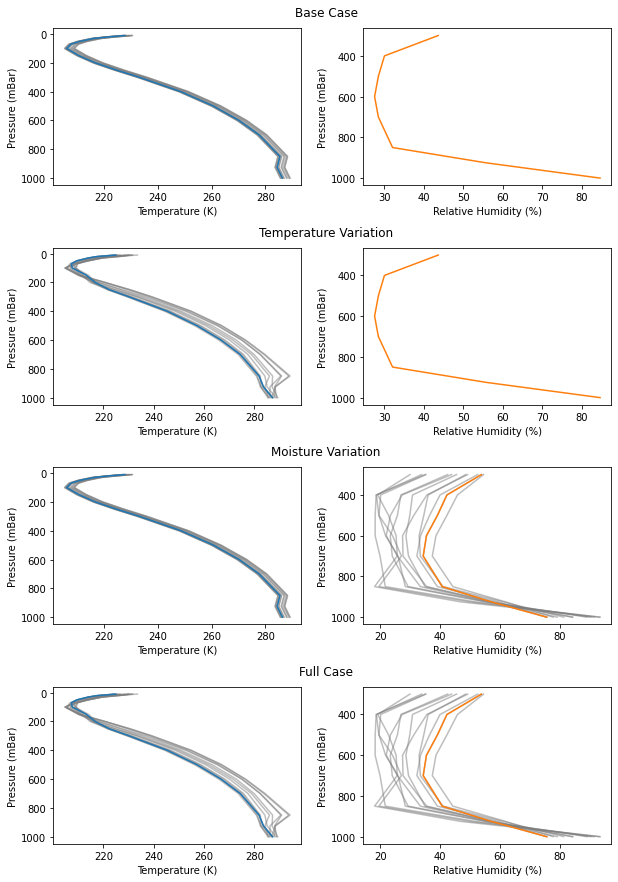

In [28]:
month_val=0

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,15))

fig.subplots_adjust(wspace = 0.25, hspace = 0.4)

lav = 32.5
lov = 237.5
lc1 = '#7d7d7d'

mean_ts = np.mean(ts_2m.sel(lat=lav, lon=lov).air.values)

for i in range(12):
    axs[0,0].plot([j + (1*ts_2m.sel(lat=lav, lon=lov).air.values[i] - mean_ts) for j in temp.sel(lat=lav, lon=lov).mean(dim='time').air.values], temp.level.values, c=lc1, alpha=0.5)

    axs[1,0].plot(temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[i]).air.values, temp.level.values, c=lc1, alpha=0.5)

    axs[2,0].plot([j + (1*ts_2m.sel(lat=lav, lon=lov).air.values[i] - mean_ts) for j in temp.sel(lat=lav, lon=lov).mean(dim='time').air.values], temp.level.values, c=lc1, alpha=0.5)
    axs[2,1].plot(rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[i]).rhum.values, rhum.level.values, c=lc1, alpha=0.5)

    axs[3,0].plot(temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[i]).air.values, temp.level.values, c=lc1, alpha=0.5)
    axs[3,1].plot(rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[i]).rhum.values, rhum.level.values, c=lc1, alpha=0.5)

axs[0,0].plot([j + (1*ts_2m.sel(lat=lav, lon=lov).air.values[month_val] - mean_ts) for j in temp.sel(lat=lav, lon=lov).mean(dim='time').air.values], temp.level.values, c='C0')
axs[0,1].plot(rhum.sel(lat=lav, lon=lov).mean(dim='time').rhum.values, rhum.level.values, c='C1')

axs[1,0].plot(temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[month_val]).air.values, temp.level.values, c='C0')
axs[1,1].plot(rhum.sel(lat=lav, lon=lov).mean(dim='time').rhum.values, rhum.level.values, c='C1')

axs[2,0].plot([j + (1*ts_2m.sel(lat=lav, lon=lov).air.values[month_val] - mean_ts) for j in temp.sel(lat=lav, lon=lov).mean(dim='time').air.values], temp.level.values, c='C0')
axs[2,1].plot(rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[month_val]).rhum.values, rhum.level.values, c='C1')

axs[3,0].plot(temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[month_val]).air.values, temp.level.values, c='C0')
axs[3,1].plot(rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[month_val]).rhum.values, rhum.level.values, c='C1')

for i1 in range(2):
    for i2 in range(4):
        axs[i2,i1].invert_yaxis()
        axs[i2,i1].set_ylabel('Pressure (mBar)')
        if i1 == 0:
            axs[i2,i1].set_xlabel('Temperature (K)')
        if i1 == 1:
            axs[i2,i1].set_xlabel('Relative Humidity (%)')

xv = 1.1
yv = 1.1
            
axs[0,0].text(xv, yv, r'Base Case', transform=axs[0,0].transAxes, fontsize=12, horizontalalignment='center', verticalalignment='center')
axs[1,0].text(xv, yv, r'Temperature Variation', transform=axs[1,0].transAxes, fontsize=12, horizontalalignment='center', verticalalignment='center')
axs[2,0].text(xv, yv, r'Moisture Variation', transform=axs[2,0].transAxes, fontsize=12, horizontalalignment='center', verticalalignment='center')
axs[3,0].text(xv, yv, r'Full Case', transform=axs[3,0].transAxes, fontsize=12, horizontalalignment='center', verticalalignment='center')

plt.savefig('./Figures/four cases vertical.png', bbox_inches='tight')